# Commonsense Reasoning: ANN vs Decision Tree


Decision Tree and Artificial Neural Network (ANN) are **natively non-linear** models.

- But how does Decision Tree differ from ANN?

Let’s motivate the discussion of Decision Tree learning model from ANN. To find their difference, we pose the following question: Can an ANN do commonsense reasoning?

ANN combines pieces of information that may have never been seen together (not guided by any rule). But commonsense reasoning is based on **sets of rules that combines information**.

To understand cooomnsense reasoning by sets of ruls, consider an example: Does Sam eat his shoes?

This type of question is well answered by **chaining relevant rules**:

- Sam is a human being.
- A human being doesn’t eat shoes.
- Chaplin is seen to be eating his shoes in Gold Rush. 

Since Sam is a human being and is NOT Chaplin, he doesn’t eat shoes.


<img src="https://cse.unl.edu/~hasan/Pics/ChaplinEatingShoe.png" width=400 height=200>


## Knowledge is Compositional

Some knowledge or concepts are compositional. These concepts can be learned by discovering the logical rules.

The **Symbolists' school** in Machine Learning solves the concept learning problem by learning sets of rules.

In the Symbolists' approach the target function is represented as a set of if-then rules.

Popular approaches to learning sets of rules.
- Inverse Deduction
- Decision Tree



## Introduction to Decision Tree

A Decision Tree is a non-parametric supervised learning method. Decision Trees are versatile algorithms (can perform both classification and regression) and even multi-output tasks. They are very powerful algorithms, capable of fitting complex datasets. 

Decision Trees create a model that predicts the value of a target variable by **learning simple decision rules** inferred from the data features.




## Key Property: Interpretability

A key property of tree-based models is that they are readily interpretable by humans. Such models are often called **white box** models. 

In contrast, Random Forests or Artificial Neural Networks are generally considered black box models. They make great predictions, nevertheless, it is usually hard to explain in simple terms why the predictions were made.


## Estimating Class Probabilities

Decision Trees can estimate the probability that an instance belongs to a particular class.



## Advantages

Apart from the above two advantages there are other benefits of Decesion Trees.

- Simple to understand and to interpret. Trees can be visualised.

- Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.

- The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

- Able to handle both numerical and categorical data. Other techniques are usually specialized in analyzing datasets that have only one type of variable. 

- Able to handle multi-output problems.

- Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.



## Disadvantages

- Decision-tree learners can create over-complex trees that do not generalize the data well. This is called **overfitting**. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

- The problem of learning an optimal decision tree is known to be **NP-Complete** under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the **greedy algorithm** where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.

- There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.

- Decision tree learners create biased trees if some classes dominate. It is therefore recommended to **balance the dataset** prior to fitting with the decision tree.



## Decision Tree: Algorithms

In a Decision Tree the goal is to find the right combination of the features to correctly distinguish the output. There are many possible ways to combine the features. 

Each possible combination is a hypothesis. Finding the optimal hypothesis (combination of features) is a **NP-Complete** problem. It requires $O(exp(n_{samples}))$ time, making the problem intractable even for fairly small training sets. This is why we must settle for a "reasonably good" solution.


Thus, to find an approximate solution, a **greedy optimization heuristic** is used.
     - Start from an empty decision tree.
     - Split on next best attribute (feature).
     - Recurse.
     
The greedy search used in decision tree learning is designed to approximately **minimize the depth of the final tree**.  
     
There are various decision tree algorithms. It is useful to know how they differ from each other.


- ID3 (Iterative Dichotomiser 3) was developed in 1986 by Ross Quinlan. The algorithm creates a **multiway tree**, finding for each node (i.e. in a greedy manner) the **categorical feature** that will yield the largest information gain for categorical targets. Trees are grown to their maximum size and then a **pruning step** is usually applied to improve the ability of the tree to generalise to unseen data.


- C4.5 is the successor to ID3 and **removed the restriction** that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals. C4.5 converts the trained trees (i.e. the output of the ID3 algorithm) into sets of **if-then rules**. These accuracy of each rule is then evaluated to determine the order in which they should be applied. Pruning is done by removing a rule’s precondition if the accuracy of the rule improves without it.


- C5.0 is Quinlan’s latest version release under a proprietary license. It uses less memory and builds smaller rulesets than C4.5 while being more accurate.


- CART (Classification and Regression Trees) is very similar to C4.5, but it differs in that it **supports numerical target variables (regression) and does not compute rule sets**. CART constructs **binary trees** using the feature and threshold that yield the largest information gain at each node.




## Decision Tree: Scikit-Learn

Scikit-Learn uses an optimized version of the Classification and Regression Tree (CART) algorithm to train Decision Trees. 

However, scikit-learn implementation **does not support categorical variables** for now.


### Handling Overfiting in Sklearn Decision Tree

Note that sklearn CART algorithm **doesn't support pruning**. 

Thus, to handle overfitting, we should carefully tune the hyperparameters that includes the following two very important hyperparameters.
- Maximum depth of the tree 
- Minimum number of samples required at a leaf node 


## Computational Complexity

Training complexity: $O(d × n log_2(n))$ 

Prediction complexity: $O(log_2(n))$ 


Here:
- d: number of features
- n: number of samples

#### Observe that although prediction is faster, training is considerably slow for larger training sets.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

# Dataset


We will use the iris dataset, which is a multivariate data set. 

This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

There are 4 features: 
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

Total number of samples: 150

The dataset is also known as Fisher's Iris data set as it was introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis".


<img src="https://cse.unl.edu/~hasan/IrisFlowers.png" width=800 height=400>

## We will use 2 features (petal length and width) for better understanding of the decision rule and visualization.

In [2]:
iris = load_iris()

X = iris.data[:, 2:] # petal length and width 
y = iris.target

## Decision Tree: Key Hyperparameters


We will use the following hyperparameters of the sklearn **DecisionTreeClassifier** class. 

For a full list of the hyperparameters visit: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier



- criterion : The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific. Default = "gini"


- max_depth : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. Default=None


- min_samples_split : The minimum number of samples required to split an internal node: Default=2

        -- If int, then consider min_samples_split as the minimum number.
        -- If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.



- min_samples_leaf : The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression. Default=1


         -- If int, then consider min_samples_leaf as the minimum number.
         -- If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.


- max_features : The number of features to consider when looking for the best split. Default="auto".

        -- If int, then consider max_features features at each split.
        -- If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
        -- If “auto”, then max_features=sqrt(n_features).
        -- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
        -- If “log2”, then max_features=log2(n_features).
        -- If None, then max_features=n_features.


- max_leaf_nodes : Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes. Default=None


- class_weight : Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y. Default=None

         -- The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))



## Growing (Training) a Decision Tree

We use only one hyperparameter (max_depth) to train the decision tree. Our goal is to understand the **process of creating the decision rule and visualize it**. Thus, a shallow tree would be convenient for investigation.

However, we should remember that Decision Trees are prone to overfitting (high variance) when it uses large depth. Thus we should handle the overfitting in deep Decision Trees by tuning the following two key hyperparameters.
- Setting the maximum depth of the tree (max_depth)
- Setting the minimum number of samples required at a leaf node (min_samples_leaf)


In [3]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

y_predict = tree_clf.predict(X)

print("Accuracy: ", accuracy_score(y, y_predict))

Accuracy:  0.96


## Visualizating The Decision Tree

We can visualize the trained Decision Tree by using the  Graphviz format. 


Graphviz is an open source **Graph Visualization** software to represent structural information as diagrams of abstract graphs and networks.
https://graphviz.gitlab.io/about/

Graphviz draws graphs specified in DOT language scripts which is a graph description language.


We can export the tree in Graphviz format using the **export_graphviz** exporter method. 

### Install GraphViz Package

The graphviz binaries and the python package can be installed with the conda package manager as follows:

        conda install python-graphviz


Alternatively binaries for graphviz can be downloaded from the graphviz project homepage, and the Python wrapper installed from pypi with 

        pip install graphviz

Below is an example graphviz export of the above tree trained on the entire iris dataset.

The results can be saved in an output file (e.g., iris.pdf) by using the following statement at the end: graph.render("iris") 

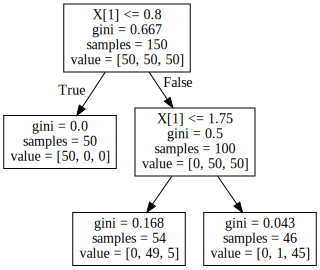

In [4]:
dot_data = export_graphviz(tree_clf, out_file=None) 

graph = graphviz.Source(dot_data) 

# Visualize the graph
graph

## Informed Visualization

We can generate more informed visualization.

The export_graphviz exporter allows us to color the nodes by their class (or value for regression) and using explicit variable and class names if desired. 

Jupyter notebook also render these plots inline automatically.

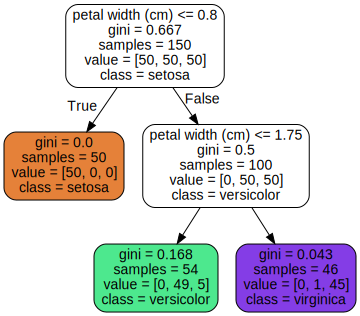

In [5]:
dot_data = export_graphviz(
    tree_clf,
    out_file=None,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

graph = graphviz.Source(dot_data)  

graph

## Function for Plotting Decision Bounday 


To better understand how Decision Tree classifier creates decision boundary, we need to **<font color=red size=6> visualize </font>** it.


We define the function "decision_boundary_decision_tree" to plot the decision boundary. 



In [6]:
def decision_boundary_decision_tree(clf, X, colorBar=False):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 0.5, X[:, 0].max() + 0.5
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    
    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    
    # Compute the class predictions for all new points
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    
    # Generate the contourf plot for the predictions
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.bwr, alpha=0.2)
    
    
    if(colorBar==True):
        plt.colorbar()   

## Plot The Decision Boundary

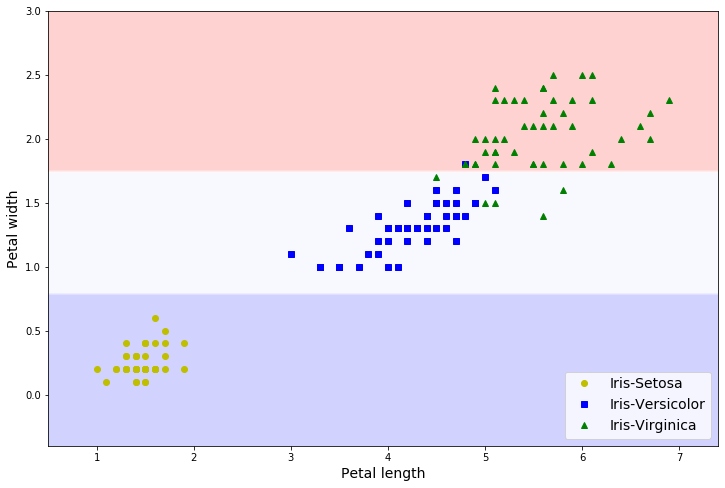

In [7]:
plt.figure(figsize=(12, 8))
decision_boundary_decision_tree(tree_clf, X)

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)

plt.show()

## Estimating Class Probabilities


A Decision Tree can also estimate the probability that an instance belongs to a particular class k. For this we will use the classifiers "predict_proba" method.

First it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class k in this node. 

For example, suppose you have found a flower whose petals are 2 cm long and 2 cm wide. 

The corresponding leaf node is the depth-1 left node, so the Decision Tree should output the following probabilities: 

- 100% for Iris-Setosa (50/50)
- 0% for Iris-Versicolor (0/50)
- 0% for Iris-Virginica (0/50). 

We can predict the class as well by using the classifiers "predict" method.

Predicted Probabilities:
 [[0.         0.02173913 0.97826087]]
Predicted Class:  [2]

Predicted Probabilities:
 [[0.         0.02173913 0.97826087]]
Predicted Class:  [2]


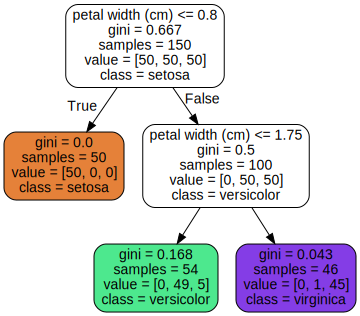

In [8]:
print("Predicted Probabilities:\n", tree_clf.predict_proba([[2, 2]]))
print("Predicted Class: ", tree_clf.predict([[2, 2]]))

print("\nPredicted Probabilities:\n", tree_clf.predict_proba([[3, 1.9]]))
print("Predicted Class: ", tree_clf.predict([[3, 1.9]]))

graph

## Main Limitation


The main issue with Decision Trees is that they are **very sensitive to small variations** in the training data. 

To illustrate this we will remove the widest Iris-Versicolor from the iris training set (the one with petals 4.8 cm long and 1.8 cm wide) and train a new Decision Tree.

We will see that the decision boundary will look very different from the previous Decision Tree. 

A consequence of this is: previously a flower with 2 cm petal length and 2 cm petal width was identified as a Setosa. But the new model will ideitify it as Virginica.

In [9]:
# Get the widest Versicolor
print("Widest Versicolor: ", X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)]) 

not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)

# Get the data without the widest Versicolor
X_no_widest_versicolor = X[not_widest_versicolor]
y_no_widest_versicolor = y[not_widest_versicolor]

tree_clf_no_widest_versicolor = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_no_widest_versicolor.fit(X_no_widest_versicolor, y_no_widest_versicolor)

Widest Versicolor:  [[4.8 1.8]]


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=40, splitter='best')

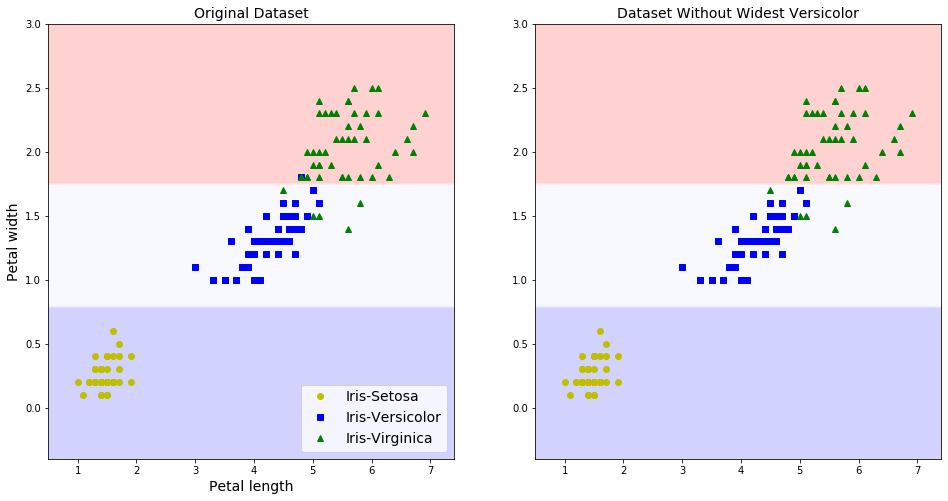

In [10]:
plt.figure(figsize=(16, 8))

plt.subplot(121)
decision_boundary_decision_tree(tree_clf, X)

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
plt.title("Original Dataset", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)

plt.subplot(122)
decision_boundary_decision_tree(tree_clf_no_widest_versicolor, X)
plt.plot(X_no_widest_versicolor[:, 0][y_no_widest_versicolor==0], 
         X_no_widest_versicolor[:, 1][y_no_widest_versicolor==0], "yo", label="Iris-Setosa")
plt.plot(X_no_widest_versicolor[:, 0][y_no_widest_versicolor==1], 
         X_no_widest_versicolor[:, 1][y_no_widest_versicolor==1], "bs", label="Iris-Versicolor")
plt.plot(X_no_widest_versicolor[:, 0][y_no_widest_versicolor==2], 
         X_no_widest_versicolor[:, 1][y_no_widest_versicolor==2], "g^", label="Iris-Virginica")

plt.title("Dataset Without Widest Versicolor", fontsize=14)

plt.show()

## Consequence of Removing the Widest Versicolor

Previously a flower with 2 cm petal length and 2 cm petal width was identified as a **Setosa (class 0)**. 

But the new model will ideitify it as **Virginica (class 2)**.

In [11]:
print("Prediction for a New Flower: Length & Width 2 cm")

print("Original Model:")
print(tree_clf.predict_proba([[2, 2]]))
print("Predicted Class: ", tree_clf.predict([[2, 2]]))


print("\nTweaked Model:")
print(tree_clf_no_widest_versicolor.predict_proba([[2, 2]]))
print("Predicted Class: ", tree_clf_no_widest_versicolor.predict([[2, 2]]))

Prediction for a New Flower: Length & Width 2 cm
Original Model:
[[0.         0.02173913 0.97826087]]
Predicted Class:  [2]

Tweaked Model:
[[0. 0. 1.]]
Predicted Class:  [2]
